In [22]:
import pandas as pd

In [23]:
segment_data = pd.read_csv('http://bit.ly/PMR-ch5') #customer segmentation data

In [24]:
segment_data.head()

,Segment,age,gender,income,kids,own_home,subscribe
0,travelers,60.794945,male,57014.537526,0,True,False
1,travelers,61.764535,female,43796.941252,0,False,False
2,travelers,47.493356,male,51095.344683,0,True,False
3,travelers,60.963694,male,56457.722237,0,True,True
4,travelers,60.594199,female,103020.070798,0,True,False


In [25]:
segment_data.describe()

,age,income,kids
count,300.000000,300.000000,300.000000
mean,40.923350,50669.454237,1.273333
std,12.827494,19336.497748,1.413725
min,18.388730,11297.309231,0.000000
25%,32.870035,41075.804389,0.000000
50%,38.896711,51560.344807,1.000000
75%,47.987569,62172.668698,2.000000
max,79.650722,108830.388732,7.000000


## Finding descriptives by group

In [ ]:
segment_data.loc[segment_data.Segment == 'moving_up']['income'].mean()

In [ ]:
segment_data.loc[(segment_data['Segment'] == 'moving_up') & (segment_data['subscribe'] == False)]['income'].mean()

In [26]:
segment_data.groupby('Segment')['income'].mean()

,income
Segment,
moving_up,51763.552666
suburb_mix,55552.282925
travelers,62609.655328
urban_hip,20267.737317


### Descriptives for two-way groups

In [27]:
segment_data.groupby(['Segment', 'own_home'])['income'].mean()

Segment     own_home
moving_up   False       51430.222115
            True        52363.547659
suburb_mix  False       56764.508540
            True        54239.038508
travelers   False       62923.233941
            True        62449.907732
urban_hip   False       20139.092369
            True        21057.984851
Name: income, dtype: float64

In [28]:
segment_data.groupby(['Segment', 'own_home', 'subscribe'])['income'].mean()

Segment     own_home  subscribe
moving_up   False     False        52380.092911
                      True         47630.738931
            True      False        52714.693149
                      True         51251.586942
suburb_mix  False     False        56478.645027
                      True         59451.625569
            True      False        54160.506701
                      True         56045.270075
travelers   False     False        62923.233941
            True      False        62949.533735
                      True         49709.444658
urban_hip   False     False        20171.798013
                      True         20031.163747
            True      False        22281.548438
                      True         13716.603325
Name: income, dtype: float64

In [29]:
segment_data.groupby(['Segment', 'own_home', 'subscribe'])['income'].mean().unstack()

subscribe                   False         True 
Segment    own_home                            
moving_up  False     52380.092911  47630.738931
           True      52714.693149  51251.586942
suburb_mix False     56478.645027  59451.625569
           True      54160.506701  56045.270075
travelers  False     62923.233941           NaN
           True      62949.533735  49709.444658
urban_hip  False     20171.798013  20031.163747
           True      22281.548438  13716.603325

### Visualization by group: frequencies and proportions

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'counts')

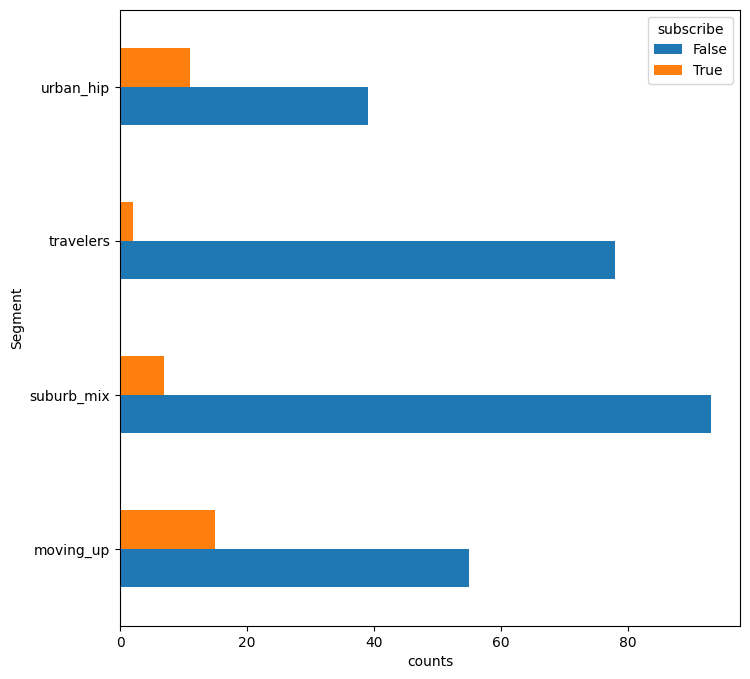

In [30]:
segments_groupby_segments = segment_data.groupby(['Segment'])
segments_groupby_segments['subscribe'].value_counts().unstack().plot(kind='barh',figsize=(8, 8))
plt.xlabel('counts')

Text(0.5, 0, 'proportion of subscribers')

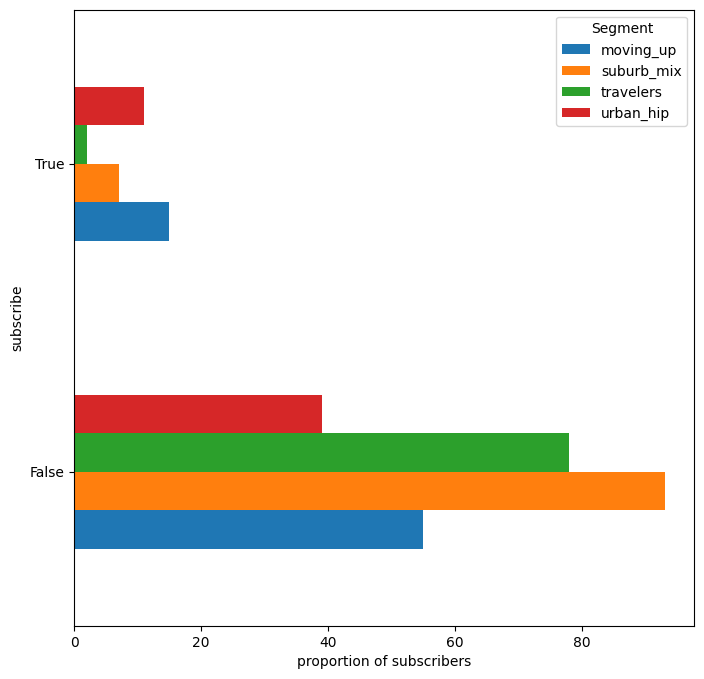

In [31]:
segment_data.groupby(['subscribe'])['Segment'].value_counts().unstack().plot(kind='barh', figsize=(8, 8))
plt.xlabel('proportion of subscribers')

<Axes: xlabel='Segment'>

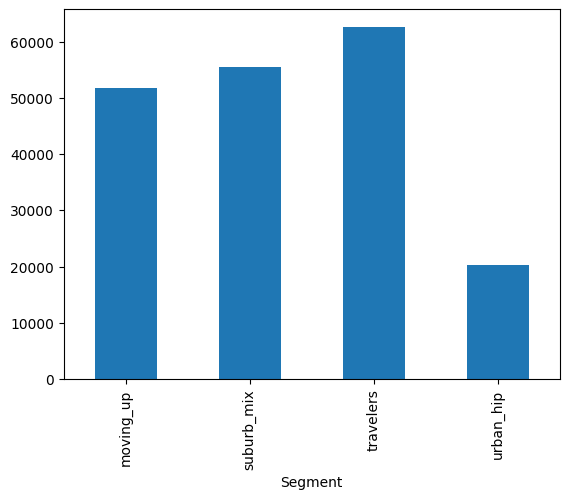

In [32]:
segment_data.groupby(['Segment'])['income'].mean().plot.bar()

<Axes: xlabel='Segment'>

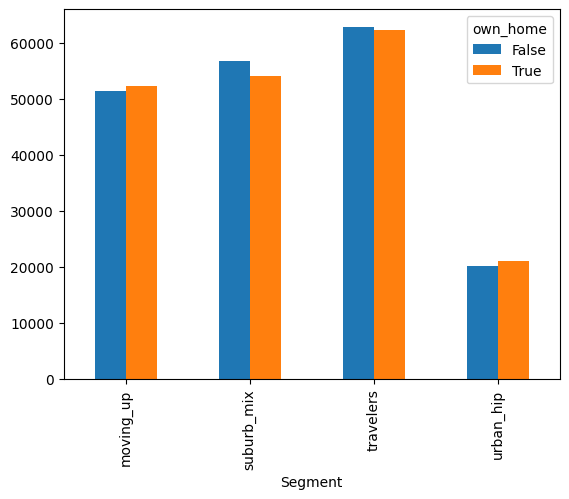

In [33]:
segment_data.groupby(['Segment', 'own_home'])['income'].mean().unstack().plot.bar()